# Lab: Predicting Digits with a Neural Net

## About MNIST Data

MNIST is a widely used dataset of hand written digits.

<img src="../assets/images/mnist-1.jpeg" />

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print ("Running in Google COLAB : ", IN_COLAB)


Running in Google COLAB :  False


## Step 1: Download data

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# backup
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.mnist.load_data()

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2 : Data Exploration

Displaying train index =  30594
train label [30594] = 2 
------------ raw data for train_image[30594] -------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  52 174 255 211 125  25   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 169 250 253 253 253 253 249 214  91   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 169 253 253 153  76 142 234 253 253 250 125   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 248 153  96   2   0   0  16 152 253 253 249  72
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  25   2   0   0   0   0   0   8 151 253 253 1

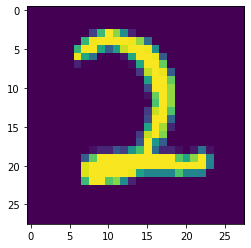

In [4]:
## Run this cell a few times to randomly display some digit data
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

## Step 3: Shape data

In [5]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

## Step 4: Create model

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:30%"/>

In [6]:
## Model 1

model = tf.keras.models.Sequential([
            keras.layers.Reshape(
              target_shape=(28 * 28,), input_shape=(28, 28)
              ),
            tf.keras.layers.Dense(128, activation=tf.nn.relu), 
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])


model.compile(
  optimizer=tf.keras.optimizers.Adam(),  # 'adam'
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
## Model 2

# model = keras.Sequential([
#     keras.layers.Reshape(
#       target_shape=(28 * 28,), input_shape=(28, 28)
#     ),
#     keras.layers.Dense(
#       units=256, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=192, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=128, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=10, activation=tf.nn.softmax #'softmax'
#     )
# ])

# model.compile(
#   optimizer=tf.keras.optimizers.Adam(),  # 'adam'
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy'])

# print (model.summary())

## Step 5 - Setup Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'mnist1' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)

Saving TB logs to :  /tmp/tensorboard-logs/mnist1/2019-09-09--21-21-24


## Step 6: Training the model


In [9]:
%%time

epochs=10
print ("training starting ...")

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)

print ("training done.")

training starting ...
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.2881 - accuracy: 0.9190 - val_loss: 0.1806 - val_accuracy: 0.9459
Epoch 2/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1294 - accuracy: 0.9626 - val_loss: 0.1207 - val_accuracy: 0.9645
Epoch 3/10
48000/48000 [==============================] - 2s 31us/sample - loss: 0.0877 - accuracy: 0.9743 - val_loss: 0.1130 - val_accuracy: 0.9659
Epoch 4/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.0999 - val_accuracy: 0.9712
Epoch 5/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0907 - val_accuracy: 0.9729
Epoch 6/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0973 - val_accuracy: 0.9726
Epoch 7/10
48000/48000 [==========

## Step 7 : See Training History

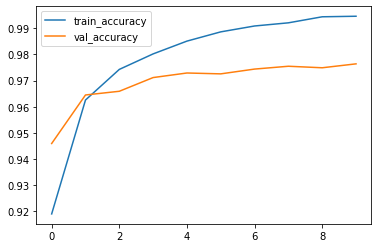

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [11]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


predicting on 10,000 images
CPU times: user 379 ms, sys: 36.1 ms, total: 415 ms
Wall time: 196 ms


random index =  4177
test_label[4177] = 5.  So the number is 5
prediction of test_image[4177] = [ 0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000]
max softmax output =  0.99996364
index of max softmax output = 5.  So the prediction is same (5)


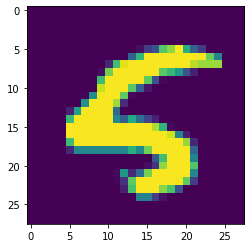

In [12]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [13]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.078
Metric : accuracy = 0.978


### 9.2 - Confusion Matrix

In [14]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

predictions shape :  (10000, 10)
prediction 0 :  [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000]
prediction 1 :  [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]


In [15]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

prediction2 0 :  7
prediction2 1 :  2


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

array([[ 969,    0,    2,    0,    1,    1,    3,    1,    2,    1],
       [   1, 1125,    3,    0,    0,    1,    2,    0,    3,    0],
       [   2,    1, 1016,    0,    1,    0,    4,    4,    4,    0],
       [   0,    0,    5,  992,    0,    3,    0,    5,    2,    3],
       [   0,    0,    3,    1,  964,    0,    2,    1,    0,   11],
       [   2,    0,    0,   12,    1,  867,    4,    1,    3,    2],
       [   4,    2,    0,    1,    4,    4,  942,    0,    1,    0],
       [   1,    2,    7,   10,    1,    0,    1,  995,    2,    9],
       [   7,    0,    7,   10,    4,    2,    3,    3,  934,    4],
       [   2,    4,    0,    5,    9,    1,    2,    4,    3,  979]])

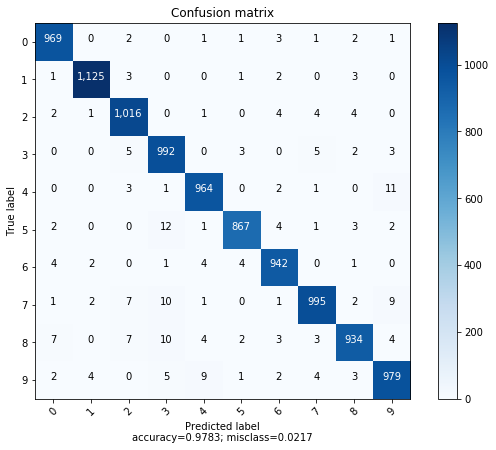

In [17]:
## Plot confusion matrix
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

import my_utils

my_utils.plot_confusion_matrix(cm, target_names=[0,1,2,3,4,5,6,7,8,9], normalize=False)

### 9.3 - Metrics Calculated from Confusion Matrix

In [18]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9847560975609755,
       'precision': 0.9807692307692307,
       'recall': 0.9887755102040816,
       'support': 980},
 '1': {'f1-score': 0.991626267078008,
       'precision': 0.9920634920634921,
       'recall': 0.9911894273127754,
       'support': 1135},
 '2': {'f1-score': 0.9792771084337349,
       'precision': 0.9741131351869607,
       'recall': 0.9844961240310077,
       'support': 1032},
 '3': {'f1-score': 0.9720725134737873,
       'precision': 0.962172647914646,
       'recall': 0.9821782178217822,
       'support': 1010},
 '4': {'f1-score': 0.9801728520589732,
       'precision': 0.9786802030456853,
       'recall': 0.9816700610997964,
       'support': 982},
 '5': {'f1-score': 0.9791078486730661,
       'precision': 0.9863481228668942,
       'recall': 0.9719730941704036,
       'support': 892},
 '6': {'f1-score': 0.980739198334201,
       'precision': 0.9781931464174455,
       'recall': 0.9832985386221295,
       'support': 958},
 '7': {'f1-score': 0

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 50
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?

**2 - Build a deeper neural net** 
- IN Step-4, uncomment and use 'model-2'.  This is a wider/deeper model
- Rerun the notebook again
- did the accuracy improve?
- how much the training time go up?